 # Image Processing - SCC0251

### Assignment 02 - Image Enhancement and Filtering

 Authors: Amanda Carrijo Viana Figur, Luiz Augusto Vieira Manoel


 Importando as bibliotecas necessárias pro Assignment

In [0]:
import imageio as img
import matplotlib.pyplot as plt
import numpy as np

A função responsável por imprimir a comparação entre a imagem original e a imagem filtrada.

Será utilizada para apresentar os exemplos.

In [0]:
def plot_compare(r, m):
    plt.figure(figsize=(12, 12))

    # defines a panel to show the images side by side
    plt.subplot(121)  # panel with 1 row, 2 columns, to show the image at the first (1st) position
    plt.imshow(r, cmap="gray")
    plt.axis('off')   # remove axis with numbers

    plt.subplot(122)  # panel with 1 row, 2 columns, to show the image at the second (2nd) position
    plt.imshow(m, cmap="gray")
    plt.axis('off')

    plt.show()

Função que normaliza as intensidades uma imagem.

In [0]:
def image_normalization(r):
    a = np.amin(r)  # menor intensidade da imagem como float pra calcular valores
    b = np.amax(r)  # maior intensidade da imagem como float pra calcular valores
    # normaliza intensidades da imagem
    r = ((r - a) * 255) / (b - a)
    return r

Função que encontra as coordenadas do centro de uma matriz.


In [0]:
def find_matrix_center(w):
    n, m = w.shape   # salva o tamanho das linhas e colunas da matriz w
    # linha
    if (n % 2 != 0): # caso o número de linhas seja par
        a = int((n - 1) / 2)
    else:            # caso o número de linhas seja ímpar
        a = int((n / 2) - 1)
    # coluna
    if (m % 2 != 0): # caso o número de colunas seja par
        b = int((m - 1) / 2)
    else:            # caso o número de colunas seja ímpar
        b = int((m / 2) - 1)
    return a,b

Função que aplica o Padding numa matriz antes de fazer as operações com a convolução.

As variáveis : `prow` e `pcol` indicam, respectivamente, o tamanho do padding a ser adicionado em cada uma das quatro posições da matriz (em cima, em baixo, direita e esquerda).



In [0]:
def image_padding(r, prow, pcol):
    r = np.pad(r, ((prow, prow), (pcol, pcol)),'constant')
    return r

Função que executa e retorna o cálculo do erro entre a imagem original `r` e a imagem modificada `m`.

In [0]:
def calculo_erro(r, m):
    # converte informações das intensidades para float (evitar erros nos cálculos)
    m = m.astype(np.float32)
    r = r.astype(np.float32)

    # cria uma matriz auxiliar na qual executaremos as contas necessárias
    aux = m - r             # calcula a diferença entre cada termo da matriz modificada e da matriz referencia
    aux = np.power(aux, 2)  # eleva cada termo da matriz ao quadrado
    soma = aux.sum()        # soma todos os termos da matriz
    RSE = np.sqrt(soma)     # a raiz quadrada da soma resulta no erro desejado

    # imprime o número RSE com 4 casas decimais de precisão e ajusta a identação
    print("Erro: ",f"{RSE:.4f}")

## Método 1 - Bilateral Filter

Abaixo vemos as funções necessárias para a execução do Método 1. Em ordem de aparição:



1.   Gaussian Kernel


> Função que calcula o Gaussian Kernel de cada um dos termos de uma matriz.


2.   Bilateral Convolution

> Função que aplica a convolução do Filtro Bilateral.

3.   Bilateral Filter


> Função que aplica o Filtro Bilateral numa imagem







In [0]:
def gaussian_kernel(x, ss):
    return (np.exp(((-1 * (x ** 2)) / (2 * (ss ** 2)))) / (2 * np.pi * (ss ** 2)))

def bilateral_convolution(r, gs, sr):
    N, M = r.shape
    n,m = gs.shape

    a, b = find_matrix_center(gs)

    # nova imagem para salvar os valores com a convolução aplicada
    g = np.zeros(r.shape, dtype=np.float32)

    #percorre a matriz da imagem
    for x in range(a, N - a):
        for y in range(b, M - b):
            If = 0
            Wp = 0
            # gets subimage
            sub_r = r[x - a: x + a + 1, y - b:y + b + 1]

            gr = np.zeros((n, m), dtype=np.float32)
            w = np.zeros((n, m), dtype=np.float32)

            for s_x in range(0, n):
                for s_y in range(0, m):
                    gr[s_x, s_y] = gaussian_kernel((sub_r[s_x, s_y] - sub_r[a, b]), sr)

                    w[s_x, s_y] = gs[s_x, s_y] * gr[s_x, s_y]

                    Wp = Wp + w[s_x, s_y]
                    If = If + (w[s_x, s_y] * sub_r[s_x, s_y])

            g[x, y] = If / Wp

    return g

def bilateral_filter(r, n, ss, sr):
    w = np.zeros((n, n), dtype=np.float32)

    a,b = find_matrix_center(w)

    # Spatial component
    for x in range(0, n):
        for y in range(0, n):
            w[x, y] = gaussian_kernel(np.sqrt(((x - a) ** 2) + ((y - b) ** 2)), ss)

    r = r.astype(np.float32)
    w = w.astype(np.float32)

    m = bilateral_convolution(r, w, sr)

    return (m.astype(np.uint8))

## Exemplos - O filtro Bilateral



Exemplo 1: original - modificada


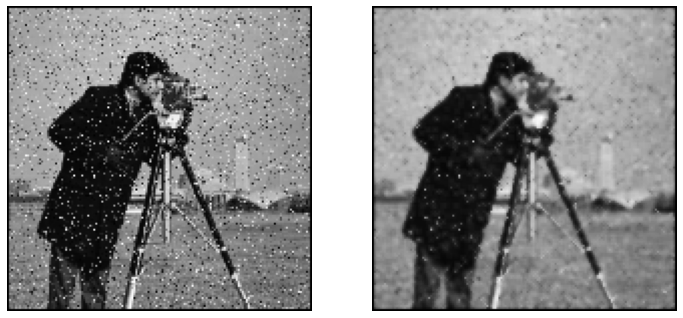

Erro:  3429.3608

Exemplo 2: original - modificada


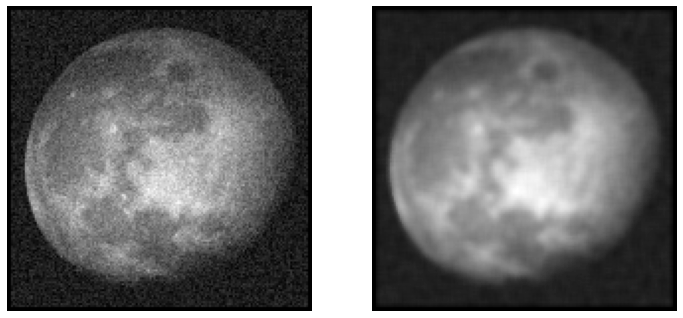

Erro:  1787.2361


In [22]:
img1 = img.imread("images/camera.png")
img2 = img.imread("images/moon.png")

print("Exemplo 1: original - modificada")
img1 = image_padding(img1, 1, 1)
img1_bilateral = bilateral_filter(img1, 3, 150.0, 100.0)
plot_compare(img1, img1_bilateral)
calculo_erro(img1, img1_bilateral)

print("\nExemplo 2: original - modificada")
img2 = image_padding(img2, 2, 2)
img2_bilateral = bilateral_filter(img2, 5, 50.0, 100.0)
plot_compare(img2, img2_bilateral)
calculo_erro(img2, img2_bilateral)

## Método 2 - Unsharp mask usando o Laplacian Filter

Abaixo vemos as funções necessárias para a execução do Método 2. Em ordem de aparição:



1.   Image Convolution


> Função que aplica a convolução da Unsharp Mask


2.   Unsharp Mask


> Função que aplica a Unsharp Mask na Imagem





In [0]:
def image_convolution(r, w):
    a,b = find_matrix_center(w)

    N, M = r.shape

    # flipped filter pra aplicar a convolução
    w_flip = np.flip(np.flip(w, 0), 1)

    # nova imagem para salvar os valores com a convolução aplicada
    g = np.zeros(r.shape, dtype=np.float32)

    # calculando o valor para cada pixel da imagem, ignorando os pixels das bordas (que aplicamos padding)
    for x in range(a, N - a):
        for y in range(b, M - b):
            # gets subimage
            sub_r = r[x - a: x + a + 1, y - b:y + b + 1]
            # computes g at (x,y)
            g[x, y] = np.sum(np.multiply(sub_r, w_flip))
    return g

def unsharp_mask(r, c, k):
    # determinando a matriz que utilizaremos para fazer a convolução
    if k == 1:
        w = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    elif k == 2:
        w = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    # converte matrizes pra precisão de ponto flutuante antes de todas as contas
    r = r.astype(np.float32)
    w = w.astype(np.float32)
    # convolucionando a imagem
    m = image_convolution(r, w)
    # normalizando a imagem modificada
    m = image_normalization(m)
    # aplicando a operação com o parâmetro c na imagem normalizada
    m = m * c + r
    # normalizando a imagem após o parâmetro c
    m = image_normalization(m)

    return (m.astype(np.uint8))

## Exemplo - Unsharp Mask

Exemplo 1: original - modificada


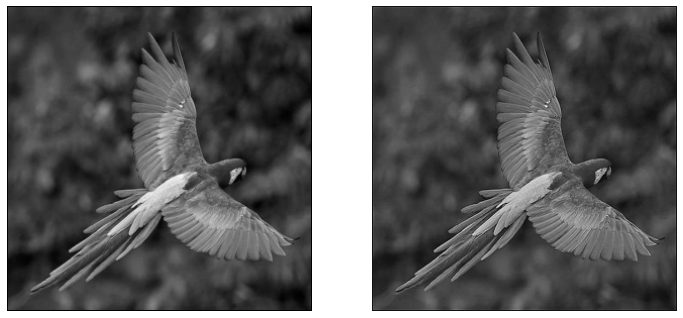

Erro:  2559.1814

Exemplo 2: original - modificada


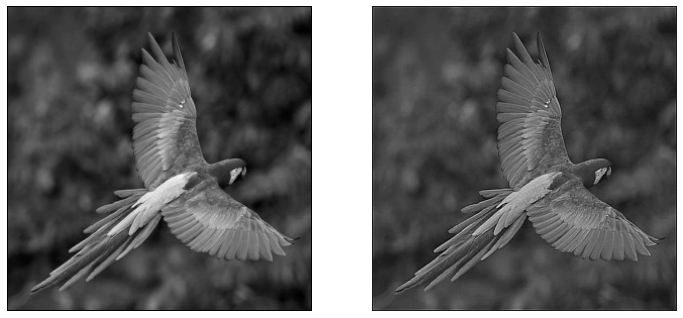

Erro:  3738.2480


In [21]:
img1 = img.imread("images/arara.png")
img2 = img.imread("images/arara.png")

print("Exemplo 1: original - modificada")
img1 = image_padding(img1, 1, 1)
img1_unsharp = unsharp_mask(img1, 0.5, 1)
plot_compare(img1, img1_unsharp)
calculo_erro(img1, img1_unsharp)

print("\nExemplo 2: original - modificada")
img2 = image_padding(img2, 1, 1)
img2_unsharp = unsharp_mask(img2, 0.75, 2)
plot_compare(img2, img2_unsharp)
calculo_erro(img2, img2_unsharp)

## Método 3 - Vignette Filter

Abaixo vemos a função Vignette Filter necessária para a execução do Método 3.

In [0]:
def vignette_filter(r, row, col):
    N, M = r.shape
    #cria matrizes necessárias e determina os valores como float
    Wrow = np.zeros(N)
    Wcol = np.zeros(M)
    Wrow = Wrow.astype(np.float32)
    Wcol = Wcol.astype(np.float32)
    r = r.astype(np.float32)
    m = np.zeros(r.shape, dtype=np.float32)

    a,b = find_matrix_center(r)

    #preenche a matriz linha e coluna com os valores calculados do Gaussian Kernel
    for x in range(0, N):
        Wrow[x] = gaussian_kernel(x - a, row)

    for y in range(0, M):
        Wcol[y] = gaussian_kernel(y - b, col)

    #um ajuste de estrutura dos dados pra poder ter um vetor coluna e fazer a multiplicação de matrizes
    Wrow = Wrow[np.newaxis]
    Wcol = Wcol[np.newaxis]

    Wrow = np.transpose(Wrow)

    w = np.multiply(Wrow, Wcol)

    #multiplica matriz termo a termo
    for x in range(0, N):
        for y in range(0, M):
            m[x, y] = r[x, y] * w[x, y]

    # normalizando a imagem modificada
    m = image_normalization(m)

    return (m.astype(np.uint8))

## Exemplo - Vignette Filter

Exemplo 1: original - modificada


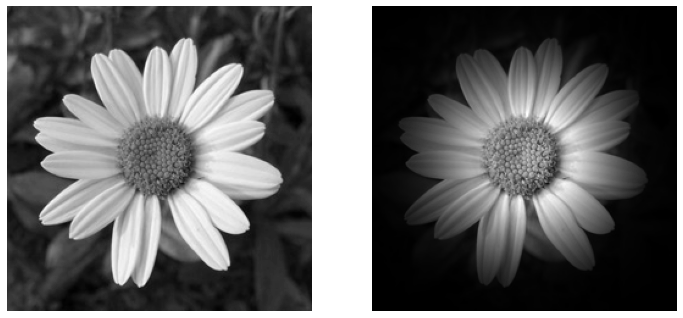

Erro:  17067.1934

Exemplo 2: original - modificada


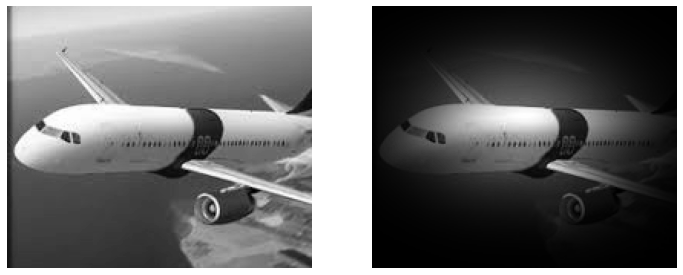

Erro:  20468.6836


In [20]:
img1 = img.imread("images/flower.png")
img2 = img.imread("images/airplane.png")

print("Exemplo 1: original - modificada")
#img1 = image_padding(img1, 1, 1)
img1_vignette = vignette_filter(img1, 50.0, 50.0)
plot_compare(img1, img1_vignette)
calculo_erro(img1, img1_vignette)

print("\nExemplo 2: original - modificada")
#img2 = image_padding(img2, 1, 1)
img2_vignette = vignette_filter(img2, 30.0, 45.0)
plot_compare(img2, img2_vignette)
calculo_erro(img2, img2_vignette)